# Implement Masking and Test Issue 517

Testing for weighted masks and fix [#517](https://github.com/materialsinnovation/pymks/issues/517).

In [1]:
import dask.array as da
import numpy as np
from pymks.fmks import correlations
from pymks import plot_microstructures

In [2]:
A = da.from_array(np.array([
    [
        [1, 0, 0],
        [0, 1, 1],
        [1, 1, 0]
    ],
    [
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1]
    ]
]))
mask = np.ones((2,3,3))
mask[:,2,1:] = 0
mask = da.from_array(mask)

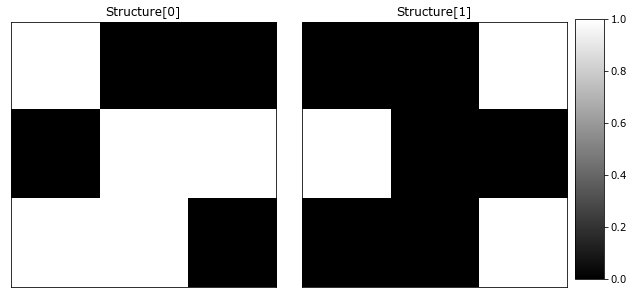

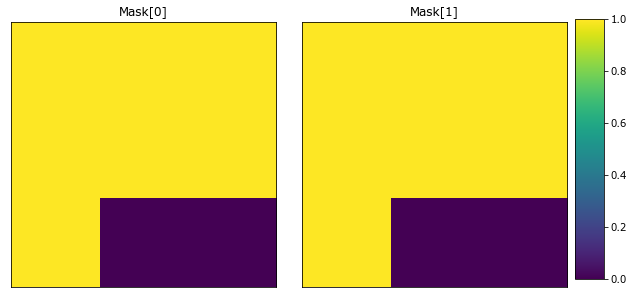

In [8]:
plot_microstructures(A[0], A[1],
                     titles=['Structure[0]', 'Structure[1]'],
                     cmap='gray')
plot_microstructures(mask[0], mask[1],
                     titles=['Mask[0]', 'Mask[1]'],
                     cmap='viridis')


## Check that periodic still works

In [9]:
correct = (correlations.cross_correlation(A, A).compute() / 9).round(3).astype(np.float64)
tested = correlations.two_point_stats(A, A).compute().round(3).astype(np.float64)
assert (correct == tested).all()

## Test that non-periodic works

In [10]:
correct_nonperiodic = np.array([
    [
        [1,1,2],
        [2,5,2],
        [2,1,1]
    ],
    [
        [0,0,0],
        [0,3,0],
        [0,0,0]
    ]
])

norm_nonperiodic = np.array([
    [4,6,4],
    [6,9,6],
    [4,6,4]
])

correct = (correct_nonperiodic / norm_nonperiodic).round(3).astype(np.float64)
tested = correlations.two_point_stats(A, A, periodic_boundary=False).compute().round(3).astype(np.float64)

assert (correct == tested).all()

## Check that masking works

In [11]:
correct_mask = np.array([
    [
        [1,0,1],
        [1,4,1],
        [1,0,1]
    ],
    [
        [0,0,0],
        [0,2,0],
        [0,0,0]
    ]
])

norm_mask = np.array([
    [2,4,3],
    [4,7,4],
    [3,4,2]
])

correct = (correct_mask / norm_mask).round(3).astype(np.float64)
tested = correlations.two_point_stats(A, A, mask=mask).compute().round(3).astype(np.float64)

assert (correct == tested).all()